[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/06-YUV_compression/color_redundancy.ipynb)

### Spectral (color) redundancy<a id='color_redundancy'></a>

* [$\text{RGB}$ domain](https://en.wikipedia.org/wiki/RGB_color_model) is more redundant than the [$\text{YUV}$ domain](https://en.wikipedia.org/wiki/YUV):

In [1]:
!if [ ! -f color_subsampling.svg ]; then \
  wget http://www.hpca.ual.es/~vruiz/images/san-diego.png; \
fi

--2022-03-20 00:13:18--  http://www.hpca.ual.es/~vruiz/images/san-diego.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 1091236 (1,0M) [image/png]
Grabando a: «san-diego.png.2»

san-diego.png.2     100%[===================>]   1,04M  1,52MB/s    en 0,7s    

2022-03-20 00:13:19 (1,52 MB/s) - «san-diego.png.2» guardado [1091236/1091236]



<img src="san-diego.png">

In [2]:
# pip install imageio scipy numpy
import imageio
from scipy.stats import entropy
import numpy as np

In [3]:
RGB = imageio.imread('san-diego.png')

In [4]:
RGB

Array([[[ 11,   0,  92],
        [ 18,   0,  85],
        [  4,   0,  89],
        ...,
        [ 34,  46, 158],
        [ 40,  57, 163],
        [ 41,  54, 163]],

       [[ 11,   0,  89],
        [  3,   0,  86],
        [  0,   0,  96],
        ...,
        [ 43,  52, 163],
        [ 50,  53, 161],
        [ 45,  49, 162]],

       [[  3,   0,  89],
        [  6,   0,  85],
        [  3,   0,  84],
        ...,
        [ 37,  50, 164],
        [ 47,  58, 163],
        [ 41,  44, 159]],

       ...,

       [[  9,   0,  77],
        [  4,   0,  71],
        [  5,   0,  78],
        ...,
        [141, 131, 182],
        [147, 135, 181],
        [152, 138, 184]],

       [[  0,   0,  78],
        [  2,   0,  71],
        [ 12,   0,  69],
        ...,
        [151, 139, 178],
        [135, 120, 172],
        [138, 123, 177]],

       [[  8,   0,  71],
        [  4,   0,  80],
        [ 11,   0,  72],
        ...,
        [181, 163, 198],
        [150, 129, 184],
        [137, 125, 183]]

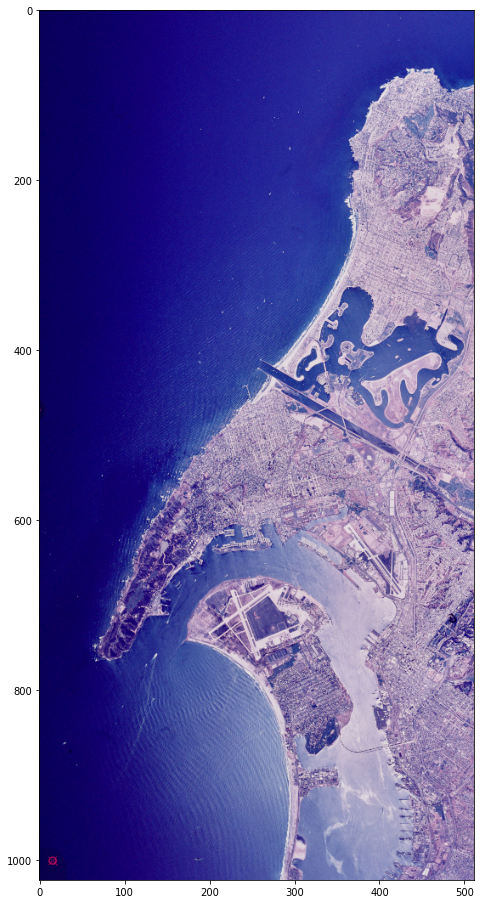

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(24,16))
plt.imshow(RGB)
#plt.show()

In [6]:
R = RGB.copy()
R[:,:,1] = 0
R[:,:,2] = 0
G = RGB.copy()
G[:,:,0] = 0
G[:,:,2] = 0
B = RGB.copy()
B[:,:,0] = 0
B[:,:,1] = 0

In [7]:
R

Array([[[ 11,   0,   0],
        [ 18,   0,   0],
        [  4,   0,   0],
        ...,
        [ 34,   0,   0],
        [ 40,   0,   0],
        [ 41,   0,   0]],

       [[ 11,   0,   0],
        [  3,   0,   0],
        [  0,   0,   0],
        ...,
        [ 43,   0,   0],
        [ 50,   0,   0],
        [ 45,   0,   0]],

       [[  3,   0,   0],
        [  6,   0,   0],
        [  3,   0,   0],
        ...,
        [ 37,   0,   0],
        [ 47,   0,   0],
        [ 41,   0,   0]],

       ...,

       [[  9,   0,   0],
        [  4,   0,   0],
        [  5,   0,   0],
        ...,
        [141,   0,   0],
        [147,   0,   0],
        [152,   0,   0]],

       [[  0,   0,   0],
        [  2,   0,   0],
        [ 12,   0,   0],
        ...,
        [151,   0,   0],
        [135,   0,   0],
        [138,   0,   0]],

       [[  8,   0,   0],
        [  4,   0,   0],
        [ 11,   0,   0],
        ...,
        [181,   0,   0],
        [150,   0,   0],
        [137,   0,   0]]

In [8]:
G

Array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  46,   0],
        [  0,  57,   0],
        [  0,  54,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  52,   0],
        [  0,  53,   0],
        [  0,  49,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  50,   0],
        [  0,  58,   0],
        [  0,  44,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 131,   0],
        [  0, 135,   0],
        [  0, 138,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 139,   0],
        [  0, 120,   0],
        [  0, 123,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 163,   0],
        [  0, 129,   0],
        [  0, 125,   0]]

In [9]:
B

Array([[[  0,   0,  92],
        [  0,   0,  85],
        [  0,   0,  89],
        ...,
        [  0,   0, 158],
        [  0,   0, 163],
        [  0,   0, 163]],

       [[  0,   0,  89],
        [  0,   0,  86],
        [  0,   0,  96],
        ...,
        [  0,   0, 163],
        [  0,   0, 161],
        [  0,   0, 162]],

       [[  0,   0,  89],
        [  0,   0,  85],
        [  0,   0,  84],
        ...,
        [  0,   0, 164],
        [  0,   0, 163],
        [  0,   0, 159]],

       ...,

       [[  0,   0,  77],
        [  0,   0,  71],
        [  0,   0,  78],
        ...,
        [  0,   0, 182],
        [  0,   0, 181],
        [  0,   0, 184]],

       [[  0,   0,  78],
        [  0,   0,  71],
        [  0,   0,  69],
        ...,
        [  0,   0, 178],
        [  0,   0, 172],
        [  0,   0, 177]],

       [[  0,   0,  71],
        [  0,   0,  80],
        [  0,   0,  72],
        ...,
        [  0,   0, 198],
        [  0,   0, 184],
        [  0,   0, 183]]

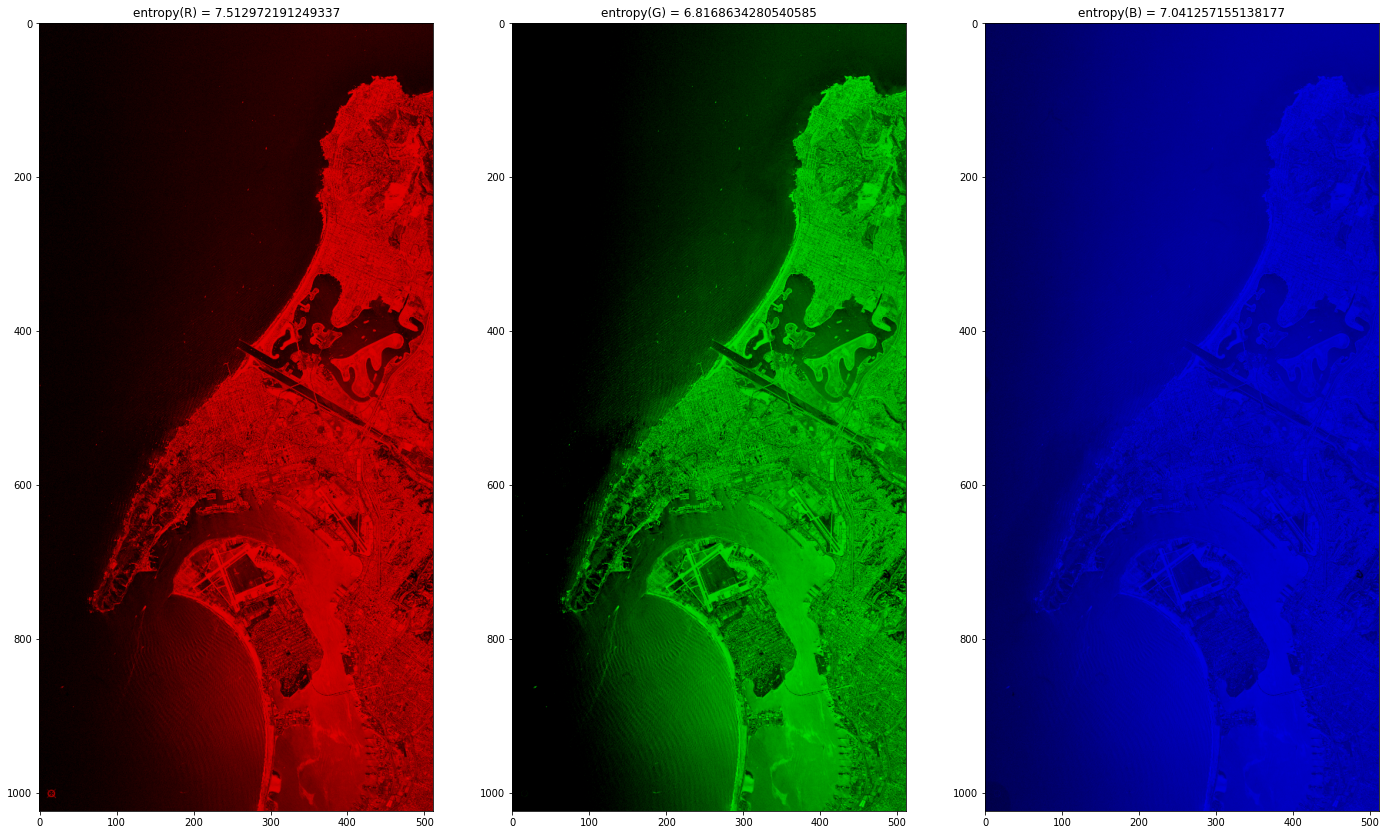

In [10]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
R_histo = np.histogram(RGB[:,:,0], bins=256)[0]
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
R_entropy = entropy(R_histo, base=2)
a.set_title("entropy(R) = " + str(R_entropy))
imgplot = plt.imshow(R)

a = fig.add_subplot(1,3,2)
G_histo = np.histogram(RGB[:,:,1], bins=256)[0]
G_entropy = entropy(G_histo, base=2)
a.set_title("entropy(G) = " + str(G_entropy))
imgplot = plt.imshow(G)

a = fig.add_subplot(1,3,3)
B_histo = np.histogram(RGB[:,:,2], bins=256)[0]
B_entropy = entropy(B_histo, base=2)
a.set_title("entropy(B) = " + str(B_entropy))
imgplot = plt.imshow(B)
plt.show()

# See https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

In [11]:
print('Total entropy = {} bits/pixel'.format(R_entropy + G_entropy + B_entropy))

Total entropy = 21.37109277444157 bits/pixel


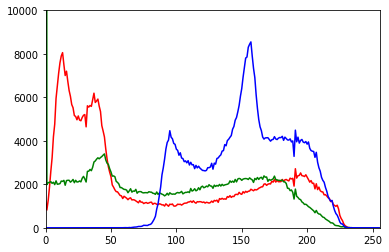

In [12]:
# pip install opencv-python
import cv2
components = ('r','g','b')
histr = [None for col in components]
for i,com in enumerate(components):
    # https://docs.opencv.org/3.4.0/d1/db7/tutorial_py_histogram_begins.html
    histr[i] = cv2.calcHist([RGB], [i], None, [256], [0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.ylim([0,10000])
plt.show()

In [13]:
# https://stackoverflow.com/questions/43983265/rgb-to-yuv-conversion-and-accessing-y-u-and-v-channels
import cv2
import numpy as np

In [14]:
def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]], dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]], dtype=np.uint8)

In [15]:
lut_U, lut_V = make_lut_u(), make_lut_v()

In [16]:
lut_U

array([[[  0, 255,   0],
        [  1, 254,   0],
        [  2, 253,   0],
        [  3, 252,   0],
        [  4, 251,   0],
        [  5, 250,   0],
        [  6, 249,   0],
        [  7, 248,   0],
        [  8, 247,   0],
        [  9, 246,   0],
        [ 10, 245,   0],
        [ 11, 244,   0],
        [ 12, 243,   0],
        [ 13, 242,   0],
        [ 14, 241,   0],
        [ 15, 240,   0],
        [ 16, 239,   0],
        [ 17, 238,   0],
        [ 18, 237,   0],
        [ 19, 236,   0],
        [ 20, 235,   0],
        [ 21, 234,   0],
        [ 22, 233,   0],
        [ 23, 232,   0],
        [ 24, 231,   0],
        [ 25, 230,   0],
        [ 26, 229,   0],
        [ 27, 228,   0],
        [ 28, 227,   0],
        [ 29, 226,   0],
        [ 30, 225,   0],
        [ 31, 224,   0],
        [ 32, 223,   0],
        [ 33, 222,   0],
        [ 34, 221,   0],
        [ 35, 220,   0],
        [ 36, 219,   0],
        [ 37, 218,   0],
        [ 38, 217,   0],
        [ 39, 216,   0],


In [17]:
lut_V

array([[[  0, 255,   0],
        [  0, 254,   1],
        [  0, 253,   2],
        [  0, 252,   3],
        [  0, 251,   4],
        [  0, 250,   5],
        [  0, 249,   6],
        [  0, 248,   7],
        [  0, 247,   8],
        [  0, 246,   9],
        [  0, 245,  10],
        [  0, 244,  11],
        [  0, 243,  12],
        [  0, 242,  13],
        [  0, 241,  14],
        [  0, 240,  15],
        [  0, 239,  16],
        [  0, 238,  17],
        [  0, 237,  18],
        [  0, 236,  19],
        [  0, 235,  20],
        [  0, 234,  21],
        [  0, 233,  22],
        [  0, 232,  23],
        [  0, 231,  24],
        [  0, 230,  25],
        [  0, 229,  26],
        [  0, 228,  27],
        [  0, 227,  28],
        [  0, 226,  29],
        [  0, 225,  30],
        [  0, 224,  31],
        [  0, 223,  32],
        [  0, 222,  33],
        [  0, 221,  34],
        [  0, 220,  35],
        [  0, 219,  36],
        [  0, 218,  37],
        [  0, 217,  38],
        [  0, 216,  39],


In [18]:
# https://docs.opencv.org/3.4.0/df/d9d/tutorial_py_colorspaces.html
YUV = cv2.cvtColor(RGB, cv2.COLOR_RGB2YUV)

In [19]:
# https://docs.opencv.org/3.4.0/d3/df2/tutorial_py_basic_ops.html
Y, U, V = cv2.split(YUV)

In [20]:
Y = cv2.cvtColor(Y, cv2.COLOR_GRAY2RGB)
U = cv2.cvtColor(U, cv2.COLOR_GRAY2RGB)
V = cv2.cvtColor(V, cv2.COLOR_GRAY2RGB)

In [21]:
# Define color palette for U_mapped and V_mapped
# https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#lut
U_mapped = cv2.LUT(U, lut_U)
V_mapped = cv2.LUT(V, lut_V)

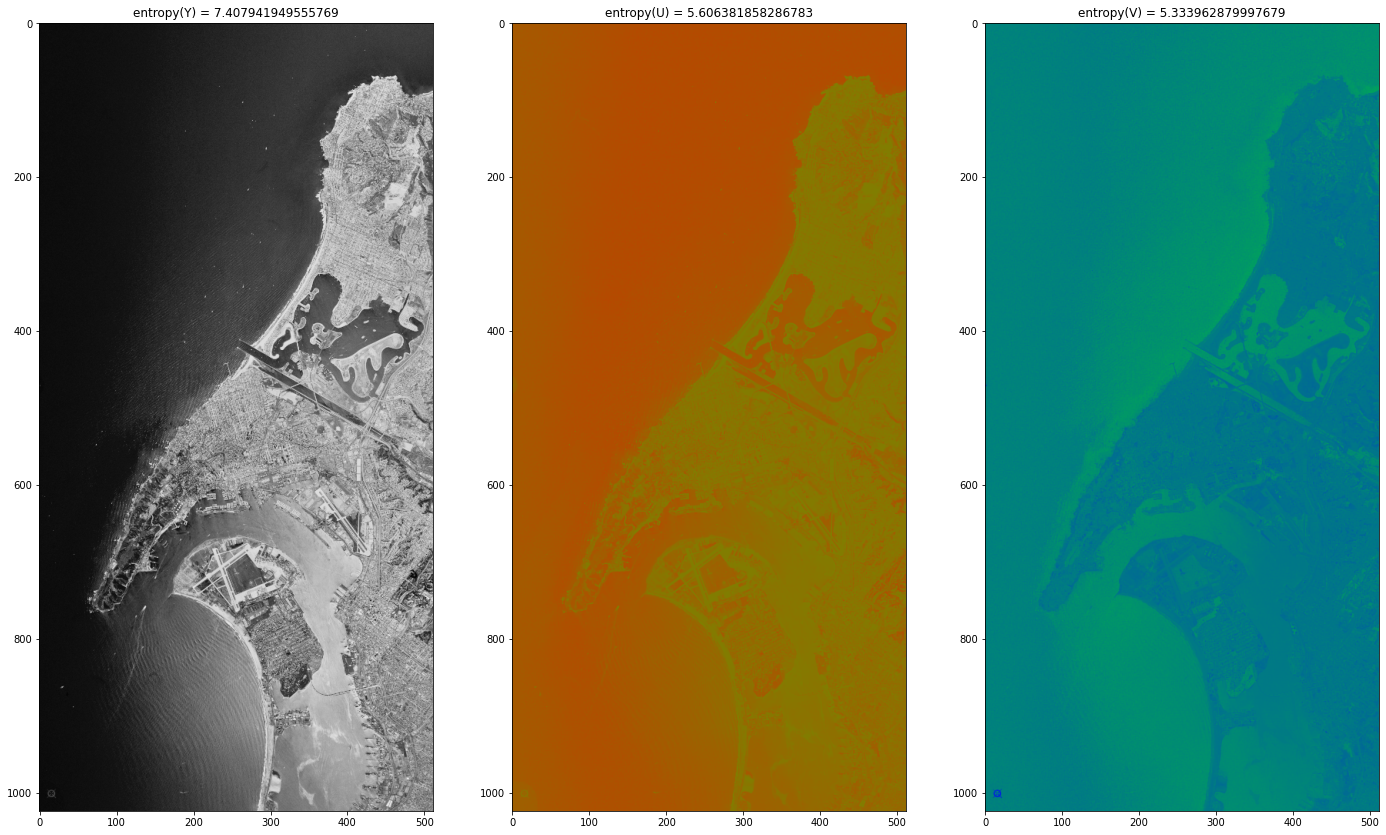

In [22]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
Y_histo = np.histogram(Y, bins=256)[0]
Y_entropy = entropy(Y_histo, base=2)
a.set_title("entropy(Y) = " + str(Y_entropy))
imgplot = plt.imshow(Y)

a = fig.add_subplot(1,3,2)
U_histo = np.histogram(U, bins=256)[0]
U_entropy = entropy(U_histo, base=2)
a.set_title("entropy(U) = " + str(U_entropy))
imgplot = plt.imshow(U_mapped)

a = fig.add_subplot(1,3,3)
V_histo = np.histogram(V, bins=256)[0]
V_entropy = entropy(V_histo, base=2)
a.set_title("entropy(V) = " + str(V_entropy))
imgplot = plt.imshow(V_mapped)

plt.show()

In [23]:
print('Total entropy = {} bits/pixel'.format(Y_entropy + U_entropy + V_entropy))

Total entropy = 18.34828668784023 bits/pixel


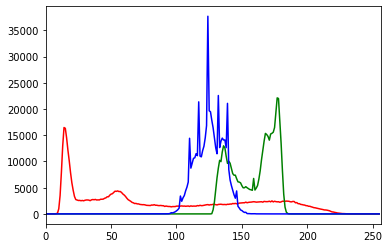

In [24]:
histr = [None for com in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([YUV],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()